In [3]:
setwd("/Users/stevennguyen/Projects/scrnaseq-analysis")

In [4]:
# load libraries 
library(Seurat)
library(ggplot2)

Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built under R 4.5.1 but the current version is
4.5.2; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




## Normalize data 

In [5]:
# Load the Seurat object
idc <- readRDS("data/processed/idc_filtered.rds")
idc

An object of class Seurat 
22914 features across 783 samples within 1 assay 
Active assay: RNA (22914 features, 0 variable features)
 1 layer present: counts

In [6]:
# run normalization 

idc <- NormalizeData(idc)

Normalizing layer: counts



In [7]:
# feature selection 
idc <- FindVariableFeatures(idc, selection.method = "vst", nfeatures = 2000)

# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(idc), 10)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(idc)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
combined_plot <- plot1 + plot2

pdf("variable_features.pdf", width = 12, height = 6)
print(combined_plot)
dev.off()

Finding variable features for layer counts

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”


pdf 
  2

In [8]:
top10

[1] "C11orf96" "IGFBP7"   "APOE"     "CCL3L1"   "G0S2"     "TAGLN"   
 [7] "HLA-DRA"  "CCL3"     "HLA-DPB1" "NDUFA4L2"

In [9]:
#scale data
all.genes <- rownames(idc)
idc <- ScaleData(idc, features = all.genes)

Centering and scaling data matrix



In [10]:
#dimensionality reduction 
idc <- RunPCA(idc, features = VariableFeatures(object = idc))

PC_ 1 
Positive:  PIP, TFF3, APOD, SERPINA3, EGR4, CLU, AC100801.1, TACSTD2, MAGED2, TM4SF1 
	   BEX1, LINC01238, AC073114.1, DAPL1, AKR1C1, YTHDF3-AS1, MINCR, PGR, CCNB1, AC096589.2 
	   PCLAF, C17orf97, CYB561D2.1, PHGR1, CKS1B, UBE2C, POPDC3, HTRA3, HIST1H4H, AC004816.1 
Negative:  SRGN, ANXA1, SGK1, TYROBP, PLIN2, HIF1A, LAPTM5, HLA-DPA1, HLA-DPB1, HLA-DRB5 
	   ZEB2, HLA-DQB1, ITGB2, CTSS, CXCR4, CD83, EMP3, MS4A6A, PLAUR, MS4A7 
	   PHACTR1, OLR1, PLEK, HLA-DRB1, FABP5, HLA-DRA, HLA-DQA1, SERPINB9, C1QA, HLA-DMB 
PC_ 2 
Positive:  TYROBP, MS4A6A, C1QA, CD83, CXCR4, MS4A7, LAPTM5, ITGB2, C1QC, PHACTR1 
	   C1QB, FCGR3A, HLA-DQA1, CCL3, OLR1, PLEK, MSR1, CTSS, HLA-DPA1, HLA-DMB 
	   IFI30, HLA-DRB5, FYB1, CD53, HLA-DQB1, LYZ, GPR183, IL1B, CCL4, LY86 
Negative:  SPARC, IGFBP7, CALD1, CAVIN1, COL4A2, CNN3, BGN, CAV1, FSTL1, PRRX1 
	   ETS1, COL18A1, LHFPL6, IGFBP5, TGFB1I1, TAGLN, CSRP2, COL4A1, AKAP12, DLC1 
	   NNMT, COL6A1, HSPG2, LAMA4, TPM2, SOD3, MT1E, MAP1B, FBLN2, COL14A1 
P

In [11]:
# Examine and visualize PCA results
print(idc[["pca"]], dims = 1:5, nfeatures = 5)

PC_ 1 
Positive:  PIP, TFF3, APOD, SERPINA3, EGR4 
Negative:  SRGN, ANXA1, SGK1, TYROBP, PLIN2 
PC_ 2 
Positive:  TYROBP, MS4A6A, C1QA, CD83, CXCR4 
Negative:  SPARC, IGFBP7, CALD1, CAVIN1, COL4A2 
PC_ 3 
Positive:  C1R, DCN, MXRA8, CCDC80, LUM 
Negative:  S1PR1, PCAT19, CDH5, AQP1, MCTP1 
PC_ 4 
Positive:  FBLN2, DCN, MEG3, MFAP4, LUM 
Negative:  TPM2, GUCY1A1, MCAM, TBX2-AS1, NOTCH3 
PC_ 5 
Positive:  CLEC10A, CD52, LGALS2, GPAT3, CD55 
Negative:  KCTD12, GPR34, LILRB4, HTRA1, APOE 


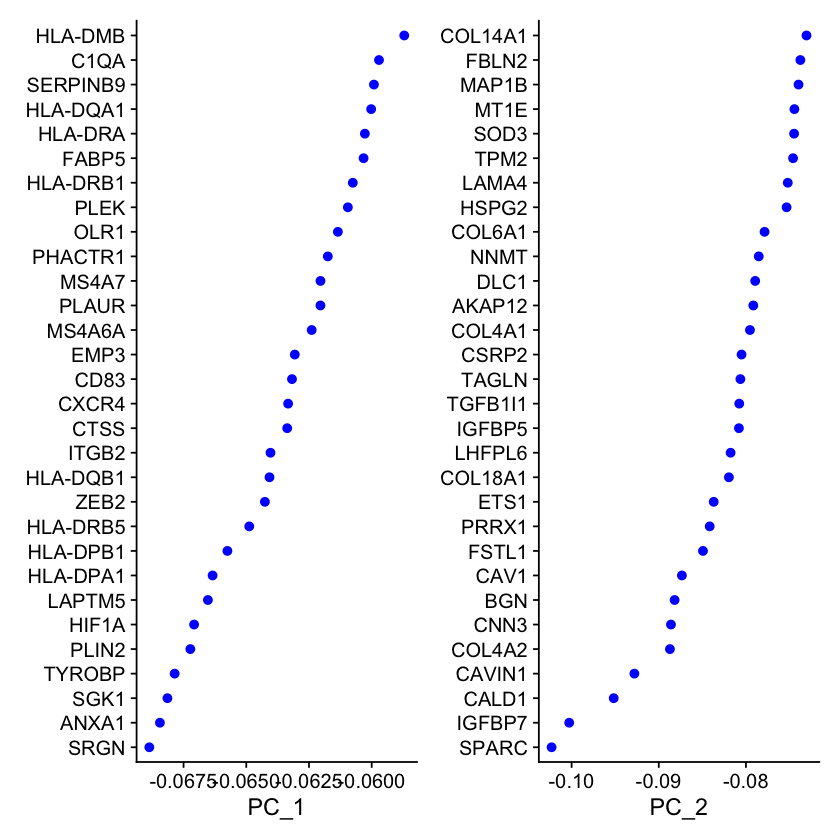

In [12]:
VizDimLoadings(idc, dims = 1:2, reduction = "pca")

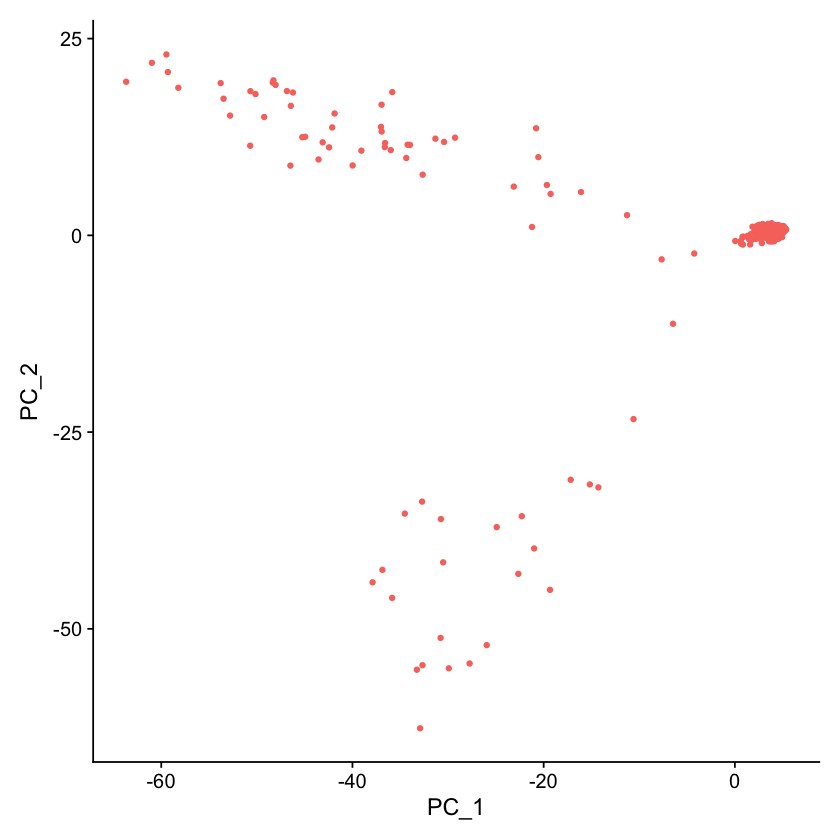

In [13]:
DimPlot(idc, reduction = "pca") + NoLegend()

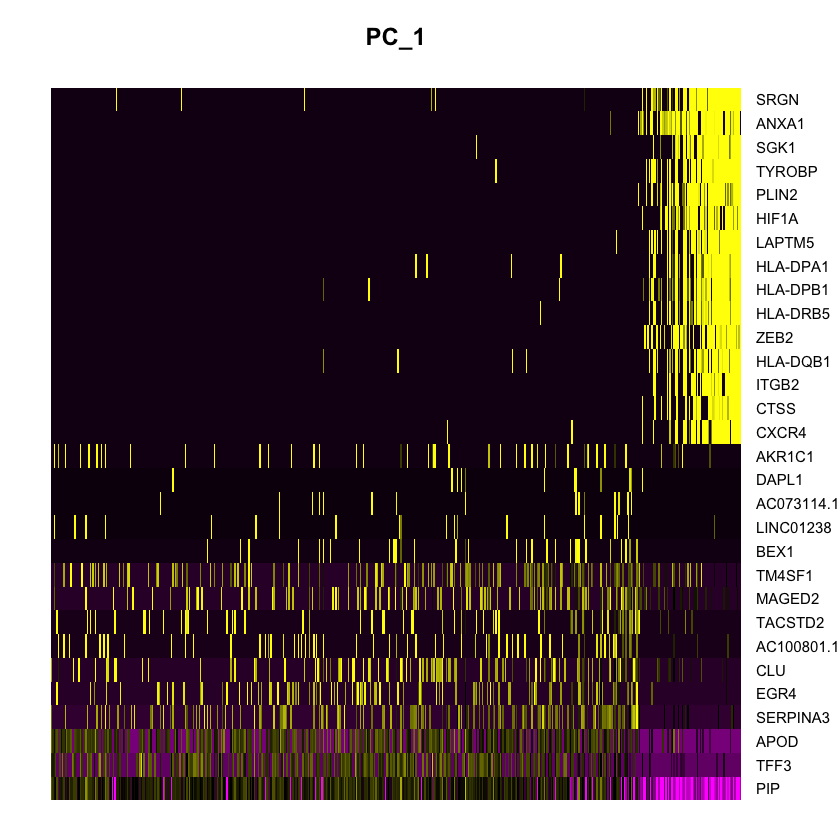

In [14]:
DimHeatmap(idc, dims = 1, cells = 500, balanced = TRUE)

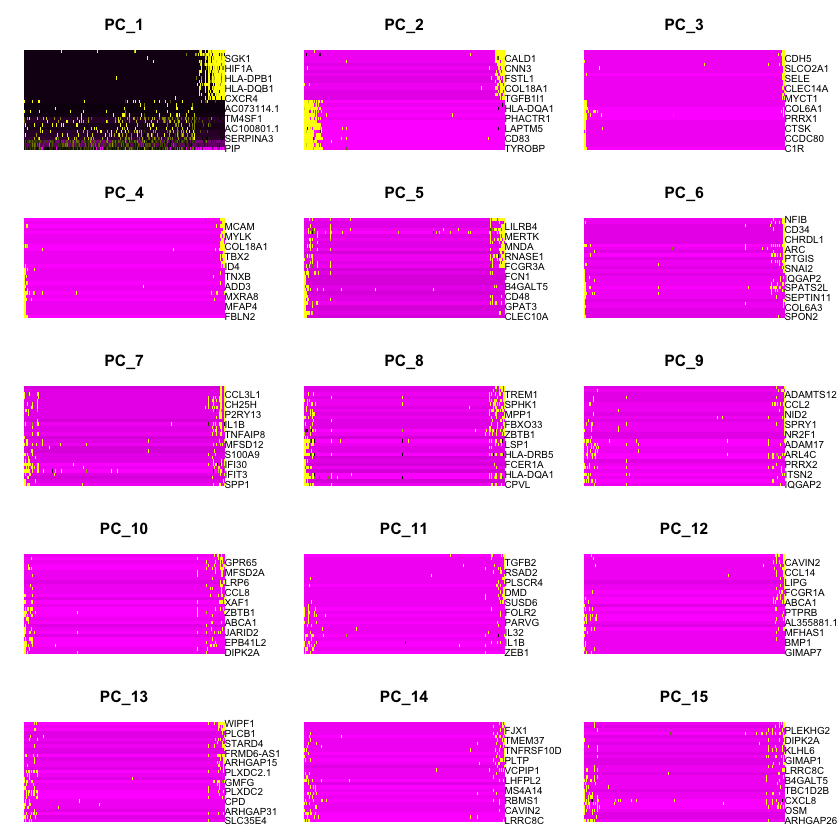

In [15]:
DimHeatmap(idc, dims = 1:15, cells = 500, balanced = TRUE)

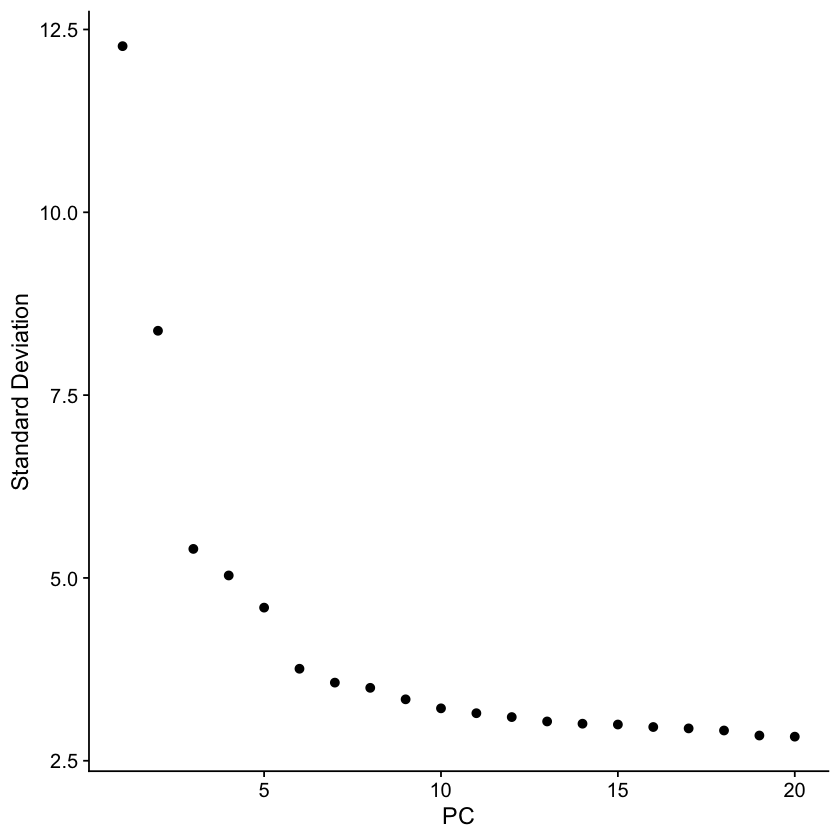

In [16]:
#determine dimensionality 
ElbowPlot(idc)

## Cluster cells 

In [17]:
idc <- FindNeighbors(idc, dims = 1:12)
idc <- FindClusters(idc, resolution = 0.5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 783
Number of edges: 31699

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6884
Number of communities: 4
Elapsed time: 0 seconds


In [18]:
# Look at cluster IDs of the first 5 cells
head(Idents(idc), 5)

AAACCCAAGGGCAGAG-1 AAACCCATCCTTCTTC-1 AAACCCATCGCCCAGA-1 AAACGAATCGTAGAGG-1 
                 1                  3                  0                  0 
AAACGCTAGTGTTGTC-1 
                 0 
Levels: 0 1 2 3

In [19]:
# UMAP 
idc <- RunUMAP(idc, dims = 1:12) # choose 12 pcs 

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
16:36:25 UMAP embedding parameters a = 0.9922 b = 1.112

16:36:25 Read 783 rows and found 12 numeric columns

16:36:25 Using Annoy for neighbor search, n_neighbors = 30

16:36:25 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:36:25 Writing NN index file to temp file /var/folders/j3/t6h175cn4l5fylz6k6f9sh8w0000gn/T//RtmpBDx9B2/file985e32ee8d6b

16:36:25 Searching Annoy index using 1 thread, search_k = 3000

16:36:25 Annoy recall = 100%

16:36:26 Commencing smooth kNN distance calibrati

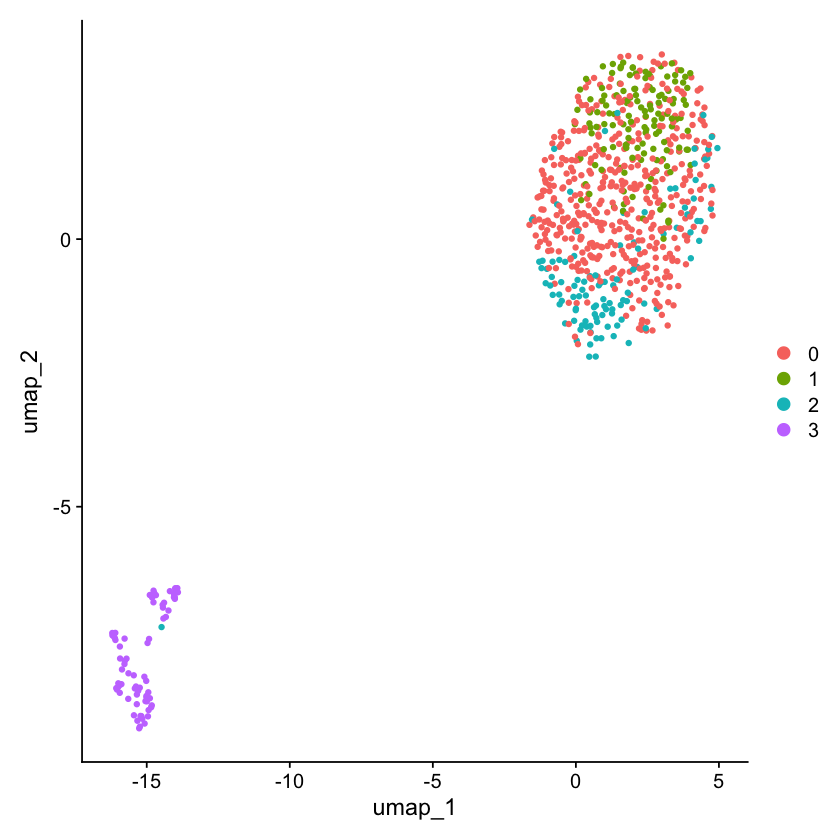

In [21]:
DimPlot(idc, reduction = "umap") 

In [22]:
# save 

saveRDS(idc, file = "/Users/stevennguyen/Projects/scrnaseq-analysis/data/processed/idc_clustered.rds")